In [1]:
import numpy as np
from skimage import data, img_as_float,img_as_ubyte,exposure,io,color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral,denoise_nl_means,estimate_sigma
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage,misc
import matplotlib.pylab as pylab

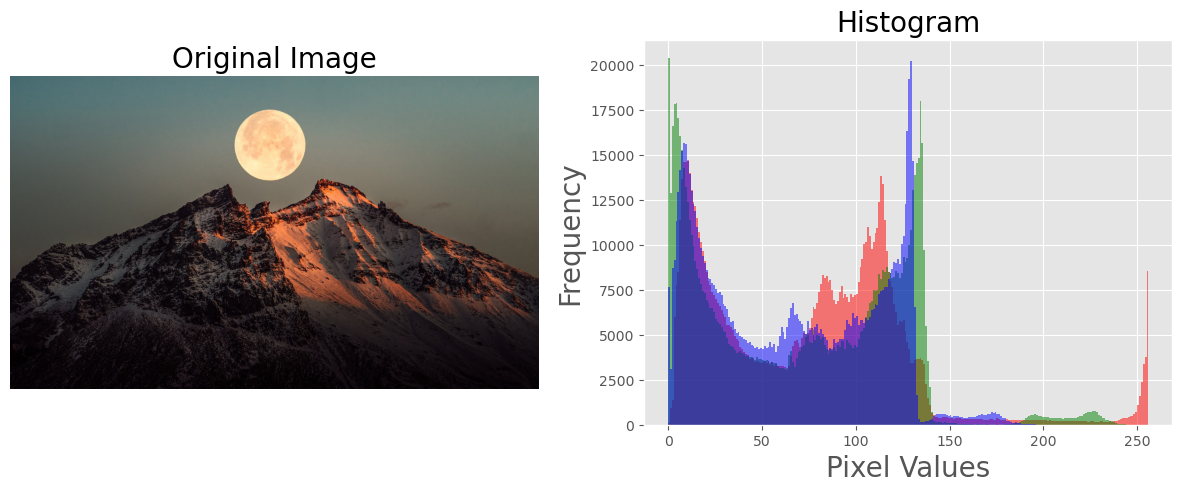

In [3]:
# load image and plot histogram
# function to display image
def display_image(image,title=""):
    pylab.title(title,size=20),pylab.imshow(image)
    pylab.axis('off')

# function to display histogram
def plot_hist(r,g,b,title=""):
    r,g,b = img_as_ubyte(r),img_as_ubyte(g),img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(),bins=256,color='r',alpha=0.5,range=(0,256))
    pylab.hist(np.array(g).ravel(),bins=256,color='g',alpha=0.5,range=(0,256))
    pylab.hist(np.array(b).ravel(),bins=256,color='b',alpha=0.5,range=(0,256))
    pylab.xlabel("Pixel Values",size=20),pylab.ylabel("Frequency",size=20)
    pylab.title(title,size=20)


im = Image.open("image1.jpg")
im_r,im_g,im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121),display_image(im,'Original Image')
pylab.subplot(122),plot_hist(im_r,im_g,im_b,'Histogram')
pylab.show()

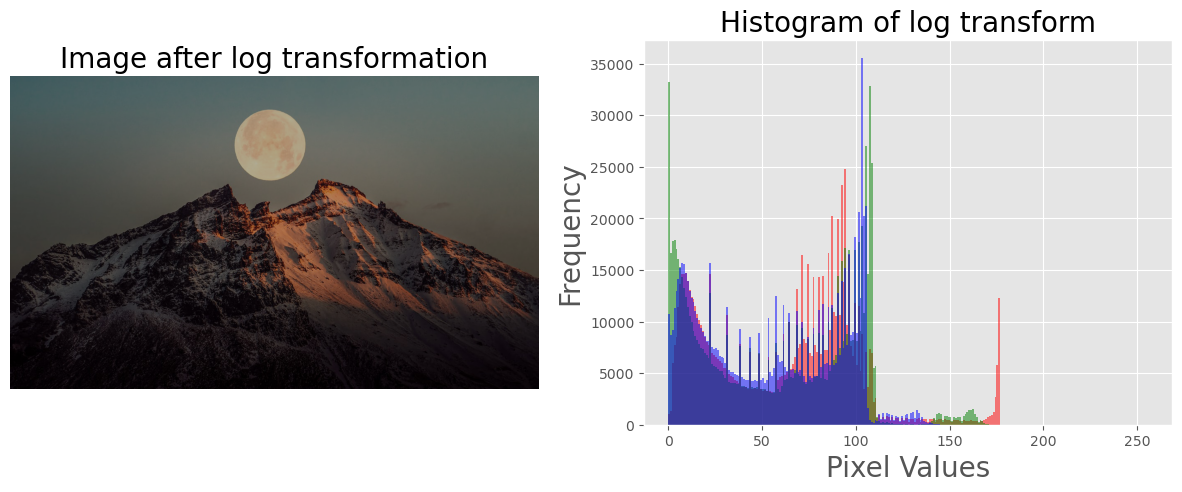

In [4]:
im = im.point(lambda i:np.int64( 255 * np.log(1 + i / 255.0)))
im_r,im_g,im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121),display_image(im,"Image after log transformation")
pylab.subplot(122),plot_hist(im_r,im_g,im_b,"Histogram of log transform")
pylab.show()


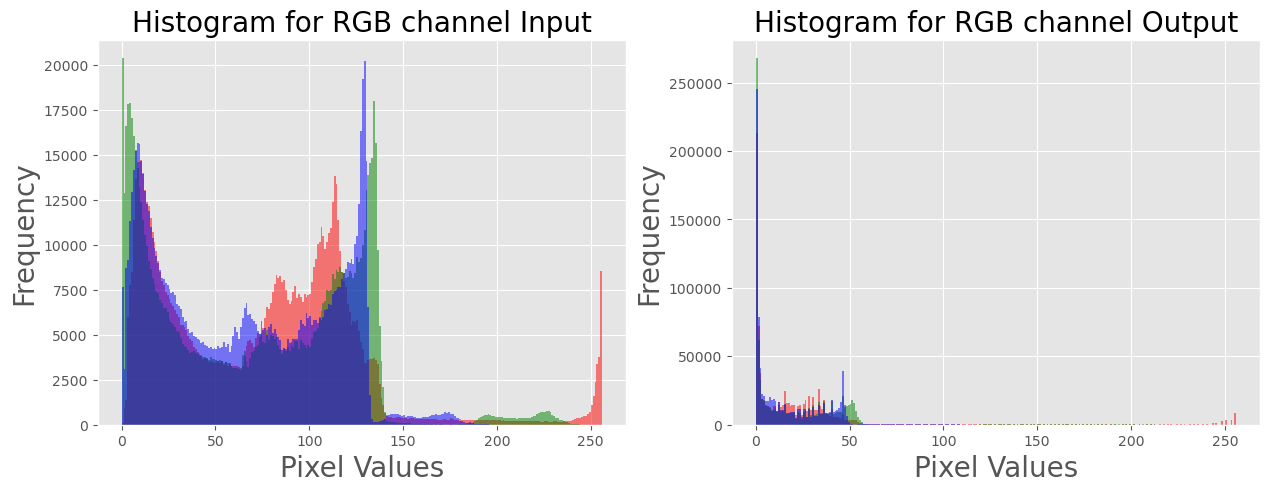

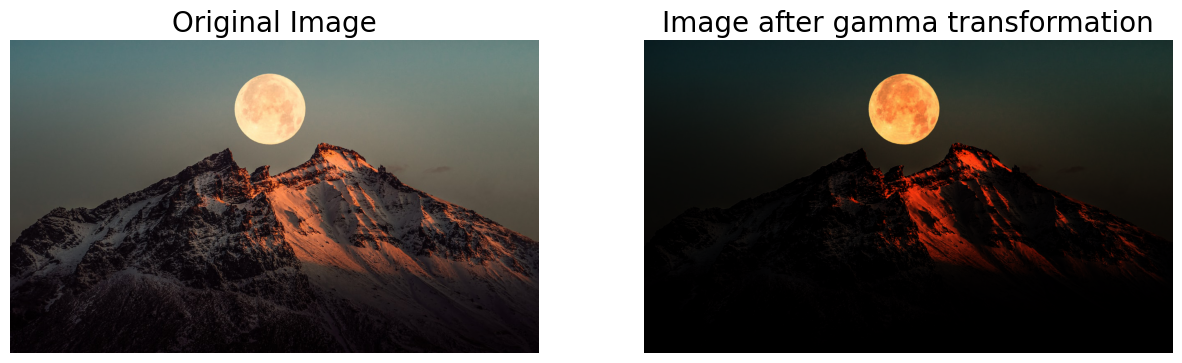

In [5]:
im = img_as_float(imread("image1.jpg"))
gamma = 2.5 
im1 = im ** gamma
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121),plot_hist(im[...,0],im[...,1],im[...,2],'Histogram for RGB channel Input')
pylab.subplot(122),plot_hist(im1[...,0],im1[...,1],im1[...,2],'Histogram for RGB channel Output')
pylab.show()
pylab.figure(figsize=(15,5))
pylab.subplot(121),display_image(im,"Original Image")
pylab.subplot(122),display_image(im1,"Image after gamma transformation")
pylab.show()

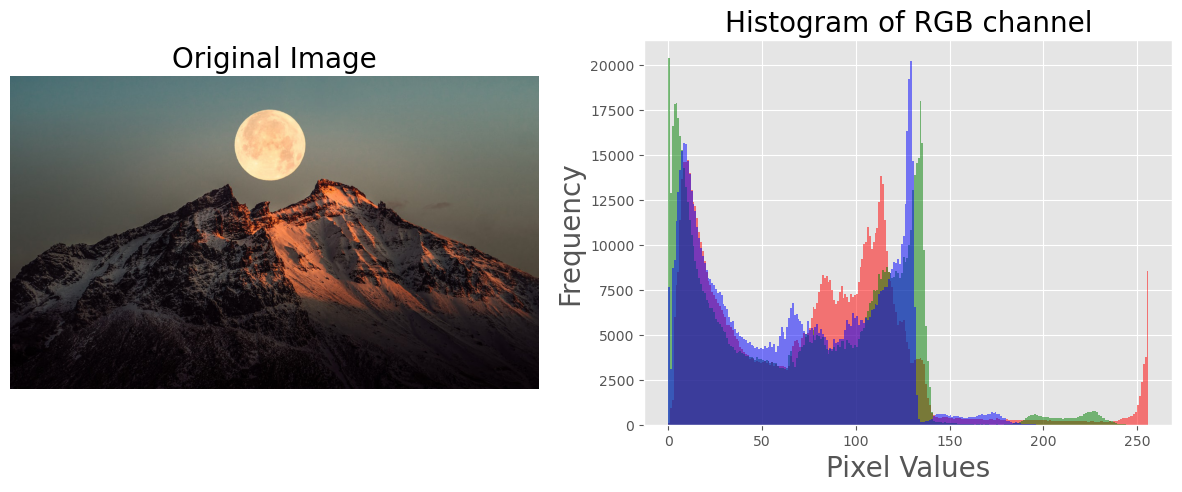

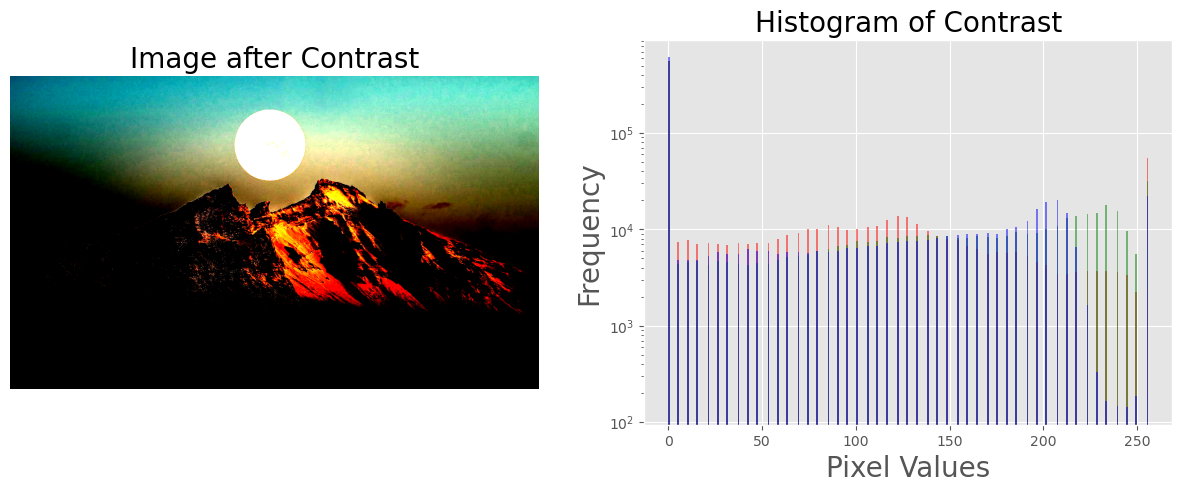

In [6]:
im = Image.open("image1.jpg")
im_r,im_g,im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121)
display_image(im,"Original Image")
pylab.subplot(122)
plot_hist(im_r,im_g,im_b,"Histogram of RGB channel")
pylab.show()

#Contrast
def contrast(c):
    return np.int64(0 if c < 50 else (255 if c > 150 else (255 * c - 22950)/48))

im1 = im.point(contrast)
im_r,im_g,im_b = im1.split()
pylab.style.use('ggplot')
pylab.figure(figsize=(15,5))
pylab.subplot(121)
display_image(im1,"Image after Contrast")
pylab.subplot(122)
plot_hist(im_r,im_g,im_b,"Histogram of Contrast")
pylab.yscale('log',base=10)
pylab.show()

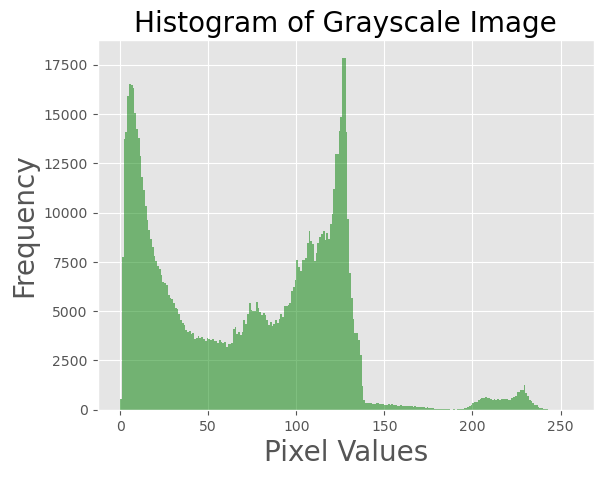

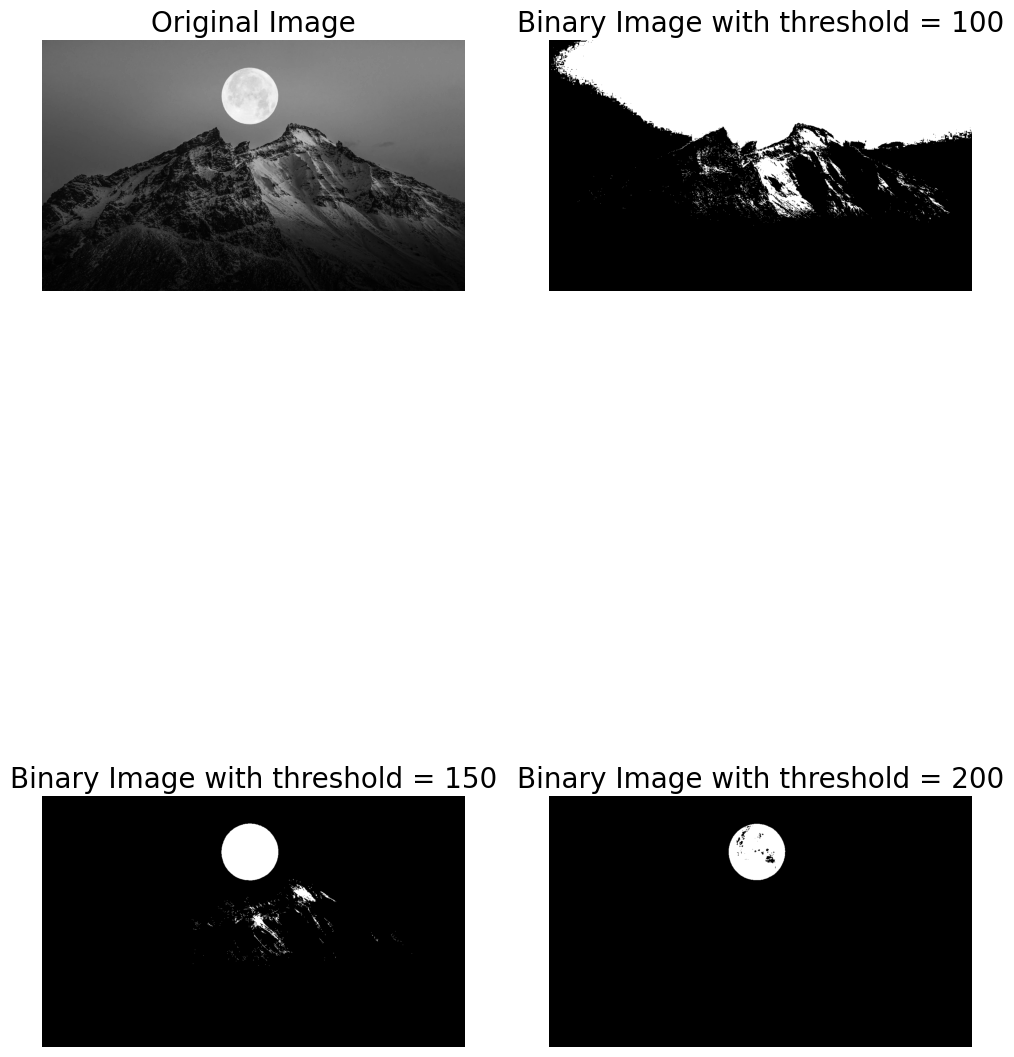

In [7]:
im = Image.open("image1.jpg").convert('L')
pylab.hist(np.array(im).ravel(),bins=256,color='g',alpha=0.5,range=(0,256))
pylab.xlabel("Pixel Values",size=20),pylab.ylabel("Frequency",size=20)
pylab.title("Histogram of Grayscale Image",size=20)
pylab.show()

pylab.figure(figsize=(12,18))
pylab.gray()
pylab.subplot(221),display_image(im,"Original Image")
pylab.axis('off')
th = [0,50,100,150,200]
for i in range(2,5):
    im1 = im.point(lambda x:x>th[i])
    pylab.subplot(2,2,i),display_image(im1,"Binary Image with threshold = "+str(th[i]))

pylab.show()